# OLIST ECOMMERCE ANALYSIS

I. Dataset

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.There's also a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
Link: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/code?datasetId=55151&sortBy=voteCount

II. An overview from the data


In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Reading all the files

orders = pd.read_csv(r'C:\Users\PC\Desktop\olist_orders_dataset.csv')
items = pd.read_csv(r'C:\Users\PC\Desktop\olist_order_items_dataset.csv')
customer = pd.read_csv(r'C:\Users\PC\Desktop\olist_customers_dataset.csv')
payments = pd.read_csv(r'C:\Users\PC\Desktop\olist_order_payments_dataset.csv')
reviews = pd.read_csv(r'C:\Users\PC\Desktop\olist_order_reviews_dataset.csv')
products = pd.read_csv(r'C:\Users\PC\Desktop\olist_products_dataset.csv')
sellers = pd.read_csv(r'C:\Users\PC\Desktop\olist_sellers_dataset.csv')
geolocation = pd.read_csv(r'C:\Users\PC\Desktop\olist_geolocation_dataset.csv')

1. Orders table:

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


There are some null values at 3 columns: order_approved_at; order_delivered_carrier_date; order_delivered_customer_date. This could be at the time of the dataset, there is no availabe record for these values. 

In [4]:
# Change data type for date-time columns
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [5]:
orders.describe(include='all', datetime_is_numeric=True)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [6]:
#Unique values of order_status
orders.groupby('order_status')['order_status'].count().sort_values()

order_status
approved           2
created            5
processing       301
invoiced         314
unavailable      609
canceled         625
shipped         1107
delivered      96478
Name: order_status, dtype: int64

The major order status at this time of this dataset is 'delivered'.

<AxesSubplot:xlabel='month'>

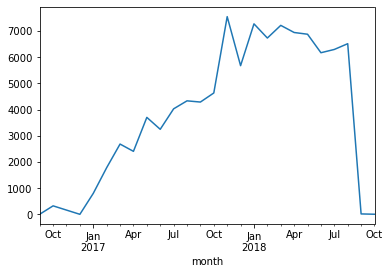

In [7]:
#orders by time, based on order_purchase_timestamp
orders['month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders.groupby('month')['order_id'].count().plot(kind='line')

In [8]:
orders.groupby('month')['order_id'].count()

month
2016-09       4
2016-10     324
2016-12       1
2017-01     800
2017-02    1780
2017-03    2682
2017-04    2404
2017-05    3700
2017-06    3245
2017-07    4026
2017-08    4331
2017-09    4285
2017-10    4631
2017-11    7544
2017-12    5673
2018-01    7269
2018-02    6728
2018-03    7211
2018-04    6939
2018-05    6873
2018-06    6167
2018-07    6292
2018-08    6512
2018-09      16
2018-10       4
Freq: M, Name: order_id, dtype: int64

There are a sharp decrease between August 2018 and September 2018 and extremely low number of orders in 2016. Maybe the origin of that is related to noise on data. For further analysis, let's just consider data from 2017-01 to 2018-08.

2. Items table

In [9]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
# Change data type for date-time columns
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'])

In [11]:
items.describe(include='object')

,order_id,product_id,seller_id
count,112650,112650,112650
unique,98666,32951,3095
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0
freq,21,527,2033


The number of orders in this table is less than in the orders table.

In [12]:
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


<AxesSubplot:xlabel='order_item_id'>

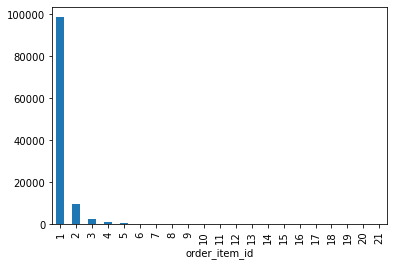

In [13]:
#Unique values of order_item_id
items.groupby('order_item_id')['order_item_id'].count().sort_values(ascending=False).plot(kind='bar')

Almost orders are for only 1 product.

3. Customers

In [14]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
customer.describe(include='object')

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [16]:
#Customer states
customer.groupby('customer_state')['customer_state'].count().sort_values(ascending=False) * 100 / 99441 

customer_state
SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
PE     1.661287
CE     1.343510
PA     0.980481
MT     0.912099
MA     0.751199
MS     0.719019
PB     0.539013
PI     0.497783
RN     0.487726
AL     0.415322
SE     0.351967
TO     0.281574
RO     0.254422
AM     0.148832
AC     0.081455
AP     0.068382
RR     0.046259
Name: customer_state, dtype: float64

There are 99441 unique customer_id corresponds to 99441 orders in orders table, 96096 customers in total come from 27 states of Brazil (all states that the country has). Nearly 42% orders with customers come from SP or Sao Paulo.

4. Payment

In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [18]:
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [19]:
payments.describe(include='object')

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


<AxesSubplot:ylabel='payment_type'>

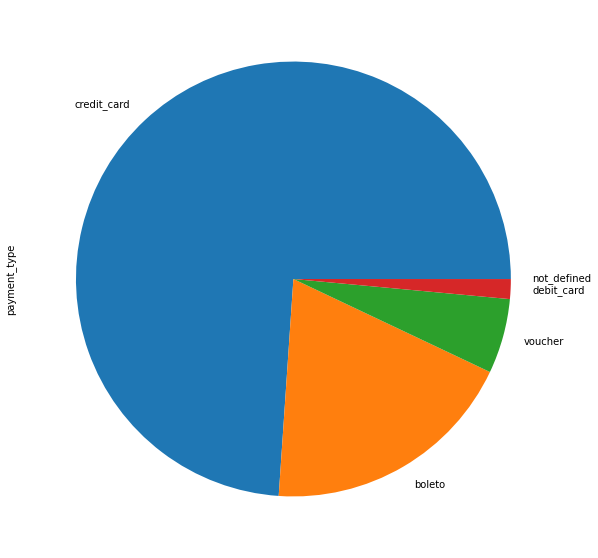

In [20]:
plt.figure(figsize=(40,10))
payments.groupby('payment_type')['payment_type'].count().sort_values(ascending=False).plot(kind='pie')


5. Reviews

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


There are some null values at review_comment_title and review_comment_message. Customers may leave only review score.

In [22]:
reviews.describe(include='object')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


there are some duplicate order_id and review_id, let's drop duplicates before analyzing.

In [23]:
reviews = reviews.drop_duplicates(subset=['review_id'])
reviews = reviews.drop_duplicates(subset=['order_id'])
reviews.describe(include='object')

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,98167,98167,11513,40582,98167,98167
unique,98167,98167,4525,36084,636,98005
top,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,Recomendo,Muito bom,2017-12-19 00:00:00,2017-12-09 15:28:29
freq,1,1,422,229,459,3


In [24]:
reviews.describe()

,review_score
count,98167.000000
mean,4.088961
std,1.345490
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


6. Products

In [25]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   product_id                        32951 non-null  object 
 1   product_category_name             32341 non-null  object 
 2   product_category_name_in_english  32341 non-null  object 
 3   product_name_lenght               32341 non-null  float64
 4   product_description_lenght        32341 non-null  float64
 5   product_photos_qty                32341 non-null  float64
 6   product_weight_g                  32949 non-null  float64
 7   product_length_cm                 32949 non-null  float64
 8   product_height_cm                 32949 non-null  float64
 9   product_width_cm                  32949 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.5+ MB


There are missing values describing the products.

In [26]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [27]:
products.describe(include='object')

,product_id,product_category_name,product_category_name_in_english
count,32951,32341,32341
unique,32951,73,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3029,3029


7. Sellers

In [28]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [29]:
sellers.describe(include='object')

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


In [30]:
sellers.groupby('seller_state')['seller_state'].count().sort_values(ascending=False) * 100 / 3095 

seller_state
SP    59.741519
PR    11.276252
MG     7.883683
SC     6.138934
RJ     5.525040
RS     4.168013
GO     1.292407
DF     0.969305
ES     0.743134
BA     0.613893
CE     0.420032
PE     0.290792
PB     0.193861
MS     0.161551
RN     0.161551
MT     0.129241
RO     0.064620
SE     0.064620
AC     0.032310
PI     0.032310
AM     0.032310
MA     0.032310
PA     0.032310
Name: seller_state, dtype: float64

There are 3095 sellers come from 23 states of Brazil. Nearly 60% seller come from SP or Sao Paulo.

8. Geolocation

In [31]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [32]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [33]:
geolocation.describe(include='object')

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


In [34]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [35]:
#One zip_code_prefix with multiple latitude and longtitude, I will get the avarage value for unique values of prefix as primary key of this table.
geolocation_avg = pd.DataFrame(geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city', 'geolocation_state'])[('geolocation_lat', 'geolocation_lng')].mean())
geolocation_avg = geolocation_avg.reset_index()

C:\Users\PC\AppData\Local\Temp\ipykernel_8488\125539402.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  geolocation_avg = pd.DataFrame(geolocation.groupby(['geolocation_zip_code_prefix','geolocation_city', 'geolocation_state'])[('geolocation_lat', 'geolocation_lng')].mean())


III. Explore data:


1. Process time

Use Bigquery create order_customer_geo table with metric of process_time by joining multiple tables.


"
WITH orders AS (
  SELECT *, 
    CASE WHEN day_difference < 0 THEN 1
    ELSE 0 END AS is_late,
    CASE WHEN day_difference < 0 THEN day_difference*(-1)
    ELSE NULL END AS late_time
  FROM(
    SELECT *,
         date_diff(order_delivered_customer_date, order_purchase_timestamp, day) AS process_time,
         date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) AS day_difference,
         date_diff(order_approved_at, order_purchase_timestamp, day) AS approve_time,
         date_diff(order_delivered_carrier_date, order_purchase_timestamp, day) AS seller_process_time,
         date_diff(order_delivered_customer_date, order_delivered_carrier_date, day) AS logistics_time,
        
         format_date("%Y%m", order_purchase_timestamp) AS month --base on the time of purchase--

    FROM `hien-348414.Ecommerce220822.olist_orders_dataset`
    WHERE order_delivered_customer_date IS NOT NULL AND order_approved_at IS NOT NULL AND order_delivered_carrier_date IS NOT NULL) AS a),
AND (order_status = 'delivered' OR order_status = 'canceled') --only check orders that completed, consist of 'delivered' and 'canceled' as customer cancel orders after they are done.

geolocation AS(
SELECT geolocation_zip_code_prefix, avg(geolocation_lat) AS geolocation_lat, avg(geolocation_lng) AS geolocation_lng
FROM `hien-348414.Ecommerce220822.olist_geolocation_dataset`
GROUP BY geolocation_zip_code_prefix),

order_customer_geo AS(
  SELECT  o.*, 

          c.customer_state AS cus_state, 
          c.customer_city AS customer_city,  

          
          g.geolocation_lat AS cus_lat, 
          g.geolocation_lng AS cus_lng, 
       

  FROM orders AS o
  JOIN `hien-348414.Ecommerce220822.olist_customers_dataset` AS c
  ON o.customer_id = c.customer_id 
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
WHERE order_purchase_timestamp BETWEEN '2017-01-01 00:00:00 UTC' AND '2018-08-31 23:59:59 UTC'
AND process_time >= 0 AND approve_time >= 0 AND seller_process_time >= 0 AND logistics_time >= 0  
)
SELECT *
FROM order_customer_geo

"



In [36]:
#Load the output:

order_customer_geo = pd.read_csv(r"C:\Users\PC\Downloads\bq-results-20220912-130504-1662987989345.csv", encoding='latin-1')
order_customer_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95925 entries, 0 to 95924
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       95925 non-null  object 
 1   customer_id                    95925 non-null  object 
 2   order_status                   95925 non-null  object 
 3   order_purchase_timestamp       95925 non-null  object 
 4   order_approved_at              95925 non-null  object 
 5   order_delivered_carrier_date   95925 non-null  object 
 6   order_delivered_customer_date  95925 non-null  object 
 7   order_estimated_delivery_date  95925 non-null  object 
 8   process_time                   95925 non-null  int64  
 9   day_difference                 95925 non-null  int64  
 10  approve_time                   95925 non-null  int64  
 11  seller_process_time            95925 non-null  int64  
 12  logistics_time                 95925 non-null 

Questions: How long does it take to process the orders? 

In [37]:
order_customer_geo['process_time'].agg(['mean', 'min', 'max', 'median'])

mean       12.064488
min         0.000000
max       209.000000
median     10.000000
Name: process_time, dtype: float64

In [38]:
#Process time by months:
order_customer_geo.groupby('month')['process_time'].agg(['mean', 'min', 'max', 'median'])

,mean,min,max,median
month,,,,
201701,12.086898,1,103,10.0
201702,12.606947,1,209,10.0
201703,12.366142,1,195,10.0
201704,14.332172,1,168,12.0
201705,10.746252,0,182,9.0
201706,11.495357,0,175,10.0
201707,11.115912,0,86,10.0
201708,10.695527,1,115,9.0
201709,11.382886,1,132,10.0


Text(0.5, 1.0, 'Average processing day of orders by month')

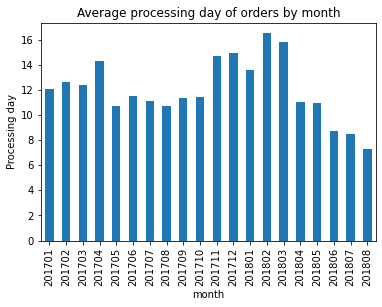

In [39]:
p1 = order_customer_geo.groupby('month')['process_time'].mean().plot(kind='bar')
p1.set_ylabel("Processing day")
p1.set_title("Average processing day of orders by month")


It takes 7-12 days to process 1 order in average, process time tends to decrease by month, except for 11/2017 to 3/2018.

In [40]:
#Process time by customers' states:
order_customer_geo.groupby('cus_state')['process_time'].mean().sort_values(ascending=False)

cus_state
RR    29.500000
AP    26.731343
AM    25.986207
AL    24.043038
PA    23.314894
MA    21.014104
SE    20.939577
CE    20.811514
AC    20.637500
PB    19.912451
PI    18.980932
RO    18.912863
BA    18.842835
RN    18.726496
PE    17.957044
MT    17.593431
TO    17.249084
ES    15.280967
MS    15.191155
GO    15.156620
RJ    14.834323
RS    14.807179
SC    14.466780
DF    12.455259
MG    11.509993
PR    11.486509
SP     8.272171
Name: process_time, dtype: float64

In [41]:
#connect to powerbi to add the map of process_time by states
pip install powerbiclient

SyntaxError: invalid syntax (1862313985.py, line 2)

In [42]:

from powerbiclient import Report, models
from io import StringIO
from ipywidgets import interact


In [43]:
# Authenticate the device to embed
from powerbiclient.authentication import DeviceCodeLoginAuthentication
 

In [44]:
# Initiate device authentication
device_auth = DeviceCodeLoginAuthentication()
access_token = device_auth.get_access_token()

Performing interactive authentication. Please follow the instructions on the terminal.
 To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code S23JXY425 to authenticate.
You have logged in.
Interactive authentication successfully completed.


In [45]:
# Generate the map

process_time_state = Report(group_id="d95c21f5-f6c7-4978-8d87-9c13e67c75e6", report_id ="10616ca0-f927-42f4-8121-b91f1d65fd0a", access_token=access_token)
process_time_state


Report()

Questions: Is delay/lateness a common issue? Why?

In [46]:
order_customer_geo['is_late'].sum() * 100 / order_customer_geo['order_id'].count()

6.7834245504300235

6.78% delays in total.

In [47]:
(order_customer_geo.groupby('cus_state')['is_late'].sum() * 100 / order_customer_geo.groupby('cus_state')['order_id'].count()).describe()

count    27.000000
mean      9.180240
std       4.794638
min       2.758621
25%       5.168488
50%       9.602021
75%      12.135177
max      21.518987
dtype: float64

In [48]:
# Late orders vs total orders by month, darker color mean longer late time

process_time_state


Report()

In [49]:
# How late?
order_customer_geo['late_time'].agg(['mean', 'min', 'max', 'median'])

mean       10.605809
min         1.000000
max       188.000000
median      7.000000
Name: late_time, dtype: float64

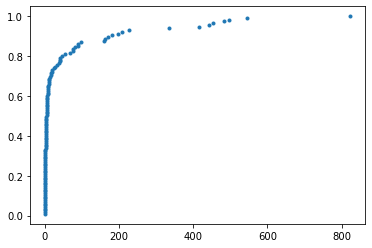

In [50]:
def ecdf(a):
    x = np.sort(a)
    y = np.arange(1, len(x) + 1) / len(x)
    return plt.plot(x, y, marker='.', linestyle='none')
#ecdf chart to show distribution of data
ecdf(order_customer_geo[order_customer_geo['is_late'] == 1].groupby('late_time')['is_late'].sum())

<AxesSubplot:xlabel='late_time'>

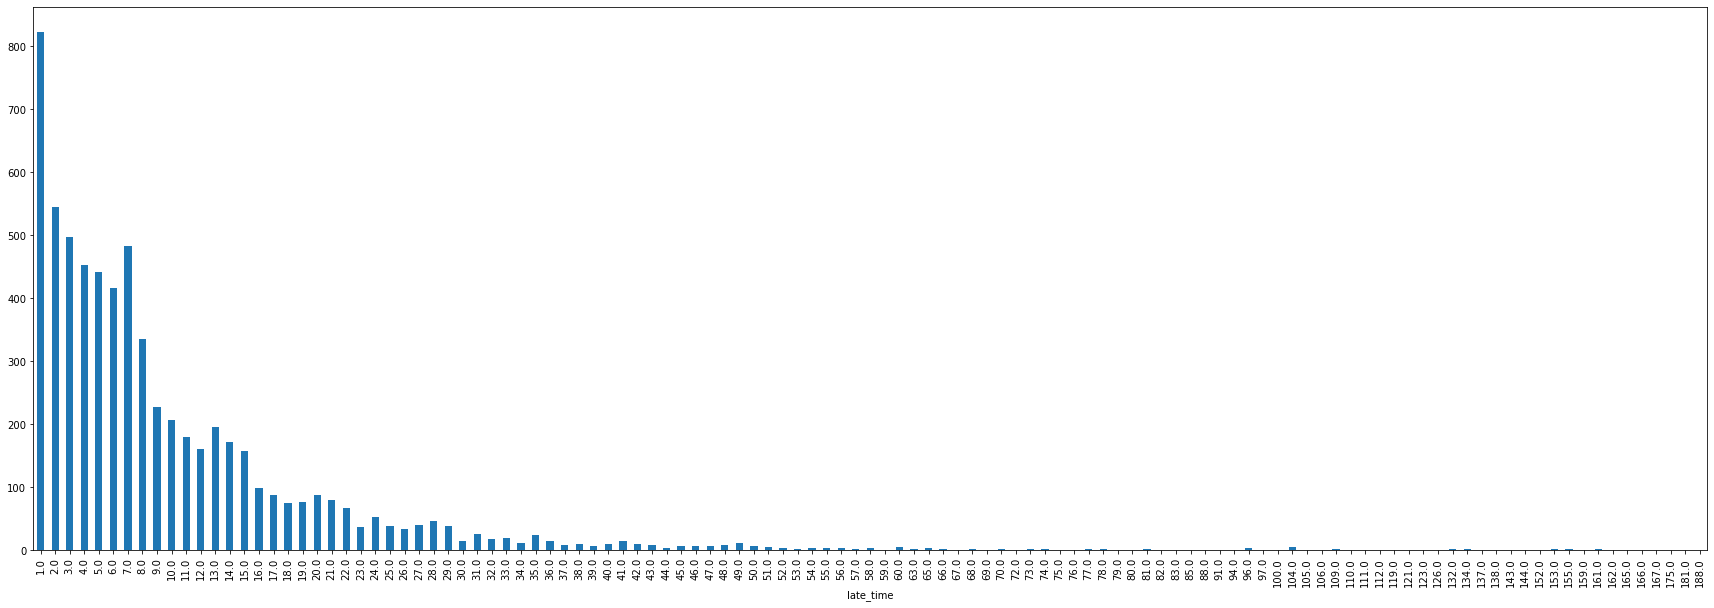

In [51]:
plt.figure(figsize=(30,10))
order_customer_geo[order_customer_geo['is_late'] == 1].groupby('late_time')['is_late'].sum().plot(kind='bar')

There is a significant number of 1-day late orders, almost < 1 month.

<AxesSubplot:xlabel='month'>

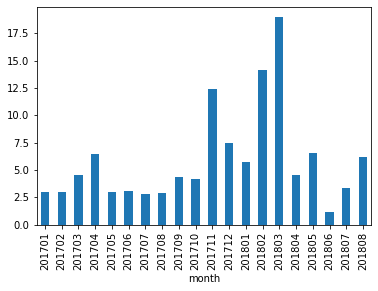

In [52]:
#late orders vs total
(order_customer_geo.groupby('month')['is_late'].sum() * 100 / order_customer_geo.groupby('month')['order_id'].count()).plot(kind='bar')

In [53]:
#late orders maps
process_time_state

Report()

Late time tends to decrease over time, in the months with a large number of orders (from 11/2017 to 03/2018), the number of late orders is also significantly higher, this may be because the logistics side has been overloaded. After that, the ratio seems to have improved.

Correlation of seller_time and logistics_partner time with late_time


Use Bigquery to create avg seller_time and logistics_partner time between late and not_late orders
"
WITH orders AS (
  SELECT *, 
    CASE WHEN day_difference < 0 THEN 1
    ELSE 0 END AS is_late,
    CASE WHEN day_difference < 0 THEN day_difference*(-1)
    ELSE NULL END AS late_time
  FROM(
    SELECT *,
         date_diff(order_delivered_customer_date, order_purchase_timestamp, day) AS process_time,
         date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) AS day_difference,
         date_diff(order_approved_at, order_purchase_timestamp, day) AS approve_time,
         date_diff(order_delivered_carrier_date, order_purchase_timestamp, day) AS seller_process_time,
         date_diff(order_delivered_customer_date, order_delivered_carrier_date, day) AS logistics_time,
        
         format_date("%Y%m", order_purchase_timestamp) AS month --base on the time of purchase--

    FROM `hien-348414.Ecommerce220822.olist_orders_dataset`
    WHERE order_delivered_customer_date IS NOT NULL AND order_approved_at IS NOT NULL AND order_delivered_carrier_date IS NOT NULL) AS a),


geolocation AS(
SELECT geolocation_zip_code_prefix, avg(geolocation_lat) AS geolocation_lat, avg(geolocation_lng) AS geolocation_lng
FROM `hien-348414.Ecommerce220822.olist_geolocation_dataset`
GROUP BY geolocation_zip_code_prefix),

order_customer_geo AS(
  SELECT  o.*, 

          c.customer_state AS cus_state, 
          c.customer_city AS customer_city,  

          
          g.geolocation_lat AS cus_lat, 
          g.geolocation_lng AS cus_lng, 
       

  FROM orders AS o
  JOIN `hien-348414.Ecommerce220822.olist_customers_dataset` AS c
  ON o.customer_id = c.customer_id 
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
WHERE order_purchase_timestamp BETWEEN '2017-01-01 00:00:00 UTC' AND '2018-08-31 23:59:59 UTC'
AND process_time >= 0 AND approve_time >= 0 AND seller_process_time >= 0 AND logistics_time >= 0  
),
not_late AS(
SELECT month, cus_state, customer_city, avg(seller_process_time) AS seller_time, avg(logistics_time) AS logistics_partner_time
FROM order_customer_geo
WHERE is_late = 0
GROUP BY month, cus_state, customer_city),
late AS(
SELECT month, customer_city, cus_state, avg(seller_process_time) AS seller_time, avg(logistics_time) AS logistics_partner_time, avg(late_time) AS avg_late_time
FROM order_customer_geo
WHERE is_late = 1
GROUP BY month, cus_state, customer_city)

SELECT late.month, late.customer_city, late.cus_state, late.avg_late_time, (late.seller_time - not_late.seller_time) AS seller_time_diff,
        (late.logistics_partner_time - not_late.logistics_partner_time) AS logistics_partner_time_diff
FROM not_late
JOIN late
ON not_late.month = late.month AND not_late.customer_city = late.customer_city AND not_late.cus_state = late.cus_state


"


In [54]:
compare = pd.read_csv(r"C:\Users\PC\Downloads\bquxjob_2313a364_18336588cc4.csv")
compare.head()

,month,customer_city,cus_state,avg_late_time,seller_time_diff,logistics_partner_time_diff
0,201704,goiania,GO,2.000000,15.142857,2.571429
1,201705,sao paulo,SP,6.095238,3.408036,11.604167
2,201704,sao paulo,SP,6.809524,5.193798,14.315615
3,201705,santo andre,SP,39.000000,-2.031250,44.250000
4,201704,porto alegre,RS,10.000000,0.416667,24.194444


<AxesSubplot:xlabel='avg_late_time', ylabel='logistics_partner_time_diff'>

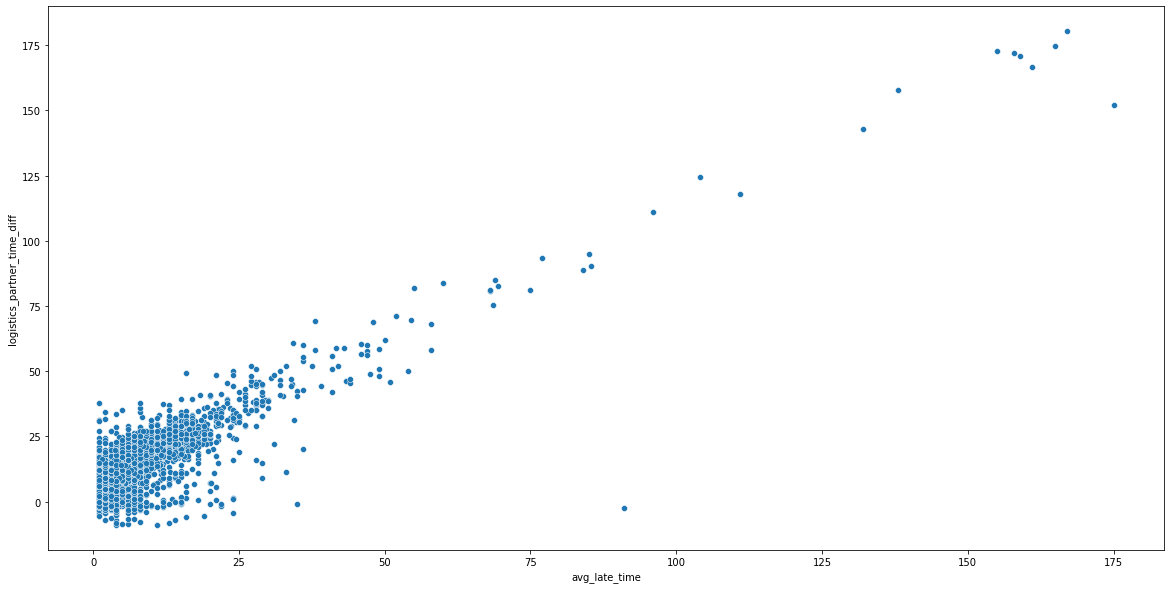

In [55]:
#Logistics partner time difference (day diff when they deliver orders in time vs late in average) and late_time
plt.figure(figsize=(20,10))
sns.scatterplot(x='avg_late_time', y='logistics_partner_time_diff', data=compare)


<AxesSubplot:xlabel='avg_late_time', ylabel='seller_time_diff'>

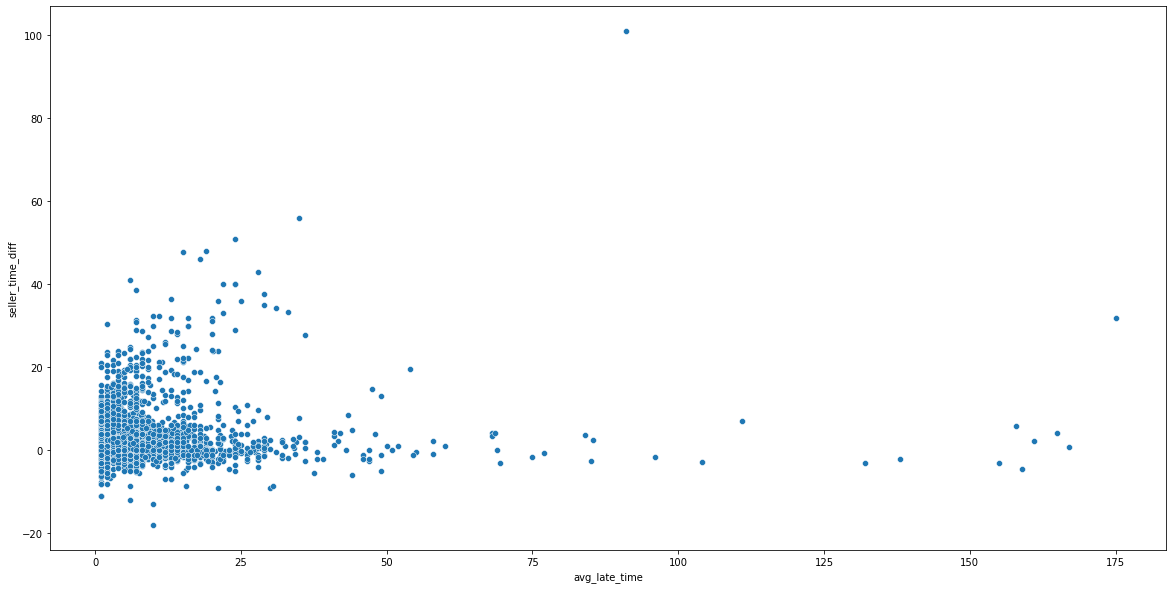

In [56]:
#Seller time difference (day diff when they deliver orders in time vs late in average) and late_time
plt.figure(figsize=(20,10))
sns.scatterplot(x='avg_late_time', y='seller_time_diff', data=compare)

From 2 scatterplots above, it seems that long delivery times by logistics partners might be a cause of order delays rather than sellers.

Question: Does the volume, or bulkiness of the goods affect orders?

In [57]:
#create items_orders
items_orders = items.merge(order_customer_geo, how='inner', on='order_id').merge(products, how='inner', on='product_id')
items_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109569 entries, 0 to 109568
Data columns (total 36 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   order_id                          109569 non-null  object        
 1   order_item_id                     109569 non-null  int64         
 2   product_id                        109569 non-null  object        
 3   seller_id                         109569 non-null  object        
 4   shipping_limit_date               109569 non-null  datetime64[ns]
 5   price                             109569 non-null  float64       
 6   freight_value                     109569 non-null  float64       
 7   customer_id                       109569 non-null  object        
 8   order_status                      109569 non-null  object        
 9   order_purchase_timestamp          109569 non-null  object        
 10  order_approved_at               

In [58]:
items_orders['measure'] = items_orders['product_length_cm'] * items_orders['product_height_cm'] * items_orders['product_width_cm']

In [59]:
items_orders.astype({'is_late': str})
items_orders.groupby('is_late')[['measure','product_weight_g']].mean()

,measure,product_weight_g
is_late,,
0,15035.860364,2063.729984
1,17136.591569,2462.829026


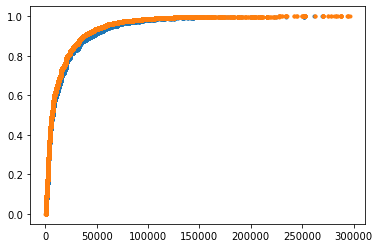

In [60]:
def ecdf(df, column):
    x = np.sort(df[column])
    y = np.arange(1, len(x) + 1) / len(x)
    return plt.plot(x, y, marker='.', linestyle='none')

#measure
late = items_orders[items_orders['is_late'] == 1]
ecdf(late, 'measure')

not_late = items_orders[items_orders['is_late'] == 0]
ecdf(not_late, 'measure')

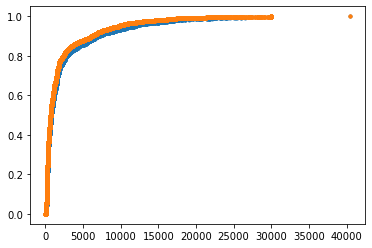

In [61]:
#product_weight_g
late = items_orders[items_orders['is_late'] == 1]
ecdf(late, 'product_weight_g')

not_late = items_orders[items_orders['is_late'] == 0]
ecdf(not_late, 'product_weight_g')

There is no discernible difference between timely and delayed orders in terms of size and volume of products

Question: Customers have bad reviews for late orders?

In [62]:
order_customer_geo_review = order_customer_geo.merge(reviews, how='inner', on='order_id')
order_customer_geo_review.groupby('review_score')['is_late'].sum() /order_customer_geo_review.groupby('review_score')['is_late'].count()

review_score
1    0.369130
2    0.190080
3    0.088262
4    0.034455
5    0.018490
Name: is_late, dtype: float64

In [63]:
order_customer_geo_review.groupby('is_late')['review_score'].mean()

is_late
0    4.293028
1    2.269346
Name: review_score, dtype: float64

About 57% of 1-star and 2-star reviews are delayed order. To know the exact cause of these reviews, it is necessary to study more closely the comments left by customers before drawing definite conclusions.

Questions: How are payment methods?

In [64]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [65]:
payments.groupby('payment_type')[['payment_value', 'order_id']].agg({'payment_value':'sum', 'order_id':'count'})

,payment_value,order_id
payment_type,,
boleto,2869361.27,19784
credit_card,12542084.19,76795
debit_card,217989.79,1529
not_defined,0.00,3
voucher,379436.87,5775


There are 3 orders with not_defined payment type and 0 value so let's remove them from the data for further analysis to avoid data noise. 


In [66]:
payments = payments[payments['payment_type'] != 'not_defined']

<AxesSubplot:ylabel='payment_value'>

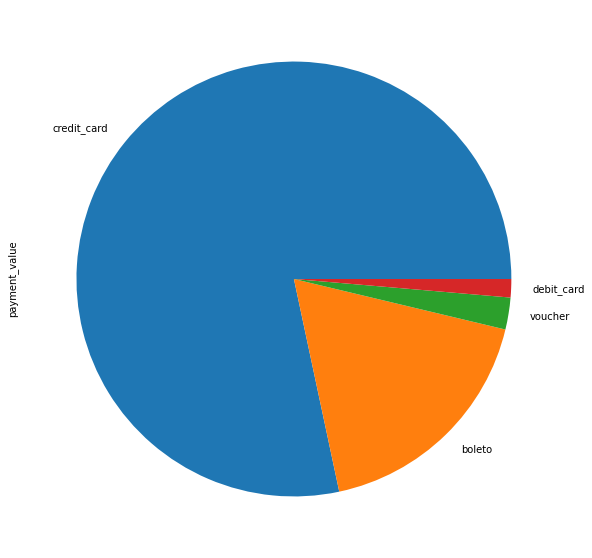

In [67]:
plt.figure(figsize=(40,10))
payments.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).plot(kind='pie')

In [68]:
payments.groupby('payment_type')[['payment_installments', 'payment_sequential']].agg(['min', 'max', 'mean', 'median'])

payment_installments                      payment_sequential      \
                              min max      mean median                min max   
payment_type                                                                    
boleto                          1   1  1.000000    1.0                  1   2   
credit_card                     0  24  3.507155    3.0                  1   3   
debit_card                      1   1  1.000000    1.0                  1   3   
voucher                         1   1  1.000000    1.0                  1  29   

                               
                  mean median  
payment_type                   
boleto        1.000051    1.0  
credit_card   1.004167    1.0  
debit_card    1.034663    1.0  
voucher       2.602424    2.0

Installment only applies to payment by credit card. Payments with vouchers tend to be split more times than other types in 1 order.

Use Biquery to create payment_per_order table
SELECT order_id, payment_type, sum(payment_value) AS payment_value, ROW_NUMBER() OVER(PARTITION BY order_id ORDER BY payment_type) AS row_no
FROM `hien-348414.Ecommerce220822.olist_order_payments_dataset`
WHERE payment_type != 'not_defined'
GROUP BY order_id, payment_type

In [69]:
payment_per_order = pd.read_csv(r"C:\Users\PC\Downloads\bq-results-20220913-141758-1663078970041.csv")
payment_per_order.head()

,order_id,payment_type,payment_value,row_no
0,00949655cdd8d0465e433a5e6c9643e5,boleto,25.87,1
1,0292fb46a5e22715459cb9a7b96e7aae,boleto,82.45,1
2,03ee7babeb6e80cbb48962ce1719fcf7,boleto,198.59,1
3,06f9b3a828a976a2fca71a4ebf55b1b2,boleto,54.09,1
4,09a38776c4e31230864f867821174daa,boleto,100.23,1


In [70]:
payment_per_order['row_no'].agg(['min', 'max'])

min    1
max    2
Name: row_no, dtype: int64

In 1 order, there are maximum 2 type of payment applied.

In [71]:
two_payment_per_order = payment_per_order[payment_per_order['row_no'] == 2]

In [72]:
two_payment_per_order = payment_per_order.merge(two_payment_per_order, how='inner', on='order_id')

In [73]:
two_payment_per_order['payment_type_x'].unique()

array(['voucher', 'credit_card', 'debit_card'], dtype=object)

With orders have 2 payment_type: they are the combinations of 2 out of 3: voucher, credit_card, debit_card

In [74]:
two_payment_per_order.sort_values(by=['order_id', 'payment_type_x'])

,order_id,payment_type_x,payment_value_x,row_no_x,payment_type_y,payment_value_y,row_no_y
2421,0016dfedd97fc2950e388d2971d718c7,credit_card,52.63,1,voucher,17.92,2
2420,0016dfedd97fc2950e388d2971d718c7,voucher,17.92,2,voucher,17.92,2
3853,009ac365164f8e06f59d18a08045f6c4,credit_card,0.88,1,voucher,31.12,2
3852,009ac365164f8e06f59d18a08045f6c4,voucher,31.12,2,voucher,31.12,2
1085,00b4a910f64f24dbcac04fe54088a443,credit_card,2.54,1,voucher,48.05,2
...,...,...,...,...,...,...,...
4440,ff7400d904161b62b6e830b3988f5cbd,voucher,100.00,2,voucher,100.00,2
1365,ffa1dd97810de91a03abd7bd76d2fed1,credit_card,36.58,1,voucher,418.73,2
1364,ffa1dd97810de91a03abd7bd76d2fed1,voucher,418.73,2,voucher,418.73,2
3143,ffa39020fe7c8a3e907320e1bec4b985,credit_card,7.13,1,voucher,64.01,2


In [75]:
two_payment_per_order.groupby('payment_type_x')['row_no_x'].agg(['max', 'min'])

,max,min
payment_type_x,,
credit_card,1,1
debit_card,2,2
voucher,2,2


So there only 2 combinations = credit and voucher or credit and debit card.

Basing on outputs above, let's redefine payment type into: boleto, credit_card, debit_card, voucher, credit_debit, credit_voucher.

Use Bigquery
"
WITH unique_payment_type_per_order AS (SELECT order_id, count(distinct payment_type) AS row_no
FROM `hien-348414.Ecommerce220822.olist_order_payments_dataset`
WHERE payment_type != 'not_defined'
GROUP BY order_id),
payment AS(SELECT y.order_id, payment_value,
        CASE WHEN y.row_no = 1 THEN payment_type
        WHEN y.row_no = 2 AND payment_type = 'voucher' THEN 'credit_voucher'
        ELSE 'credit_debit' END AS payment_type_per_order
FROM (
SELECT order_id, payment_type, sum(payment_value) AS payment_value, ROW_NUMBER() OVER(PARTITION BY order_id ORDER BY payment_type) AS row_no
FROM `hien-348414.Ecommerce220822.olist_order_payments_dataset`
GROUP BY order_id, payment_type) AS y 
JOIN unique_payment_type_per_order
ON unique_payment_type_per_order.order_id = y.order_id AND unique_payment_type_per_order.row_no = y.row_no)
SELECT *
FROM payment
"
C:\Users\PC\Downloads\bq-results-20220913-145101-1663080704434.csv

So there only 2 combinations = credit and voucher or credit and debit card.

In [76]:
payment_revised = pd.read_csv(r"C:\Users\PC\Downloads\bq-results-20220913-145101-1663080704434.csv")
payment_revised.head()

,order_id,payment_value,payment_type_per_order
0,a079628ac8002126e75f86b0f87332e4,50.00,credit_debit
1,012ea594e035047289b3e7c3f8b90cef,72.35,boleto
2,029a092ea19290f774d21c51fd7ac45f,117.01,boleto
3,02f886b28af7079755677a544bc54fda,124.14,boleto
4,03ebfa9712b7dbc7031291856263b314,55.78,boleto


In [77]:
payment_revised.groupby('payment_type_per_order')[['payment_value', 'order_id']].agg({'payment_value':'sum', 'order_id':'count'})

,payment_value,order_id
payment_type_per_order,,
boleto,2869361.27,19784
credit_card,12397278.59,74259
credit_debit,50.00,1
credit_voucher,194014.59,2245
debit_card,217939.79,1527
voucher,185422.28,1621


<AxesSubplot:ylabel='payment_value'>

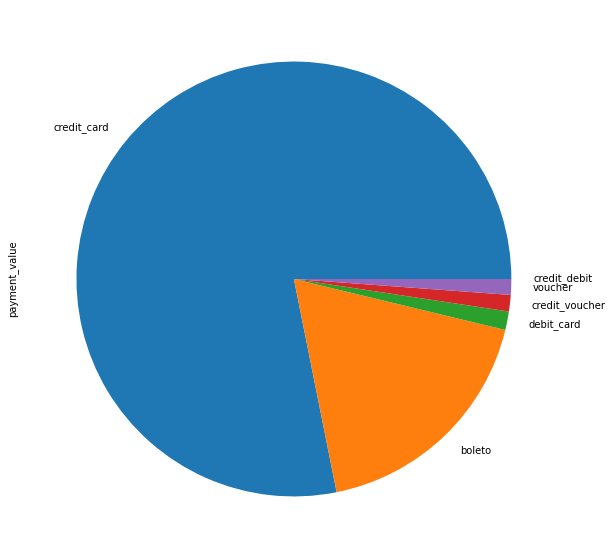

In [78]:
plt.figure(figsize=(40,10))
payment_revised.groupby('payment_type_per_order')['payment_value'].sum().sort_values(ascending=False).plot(kind='pie')

In [79]:
#payment_type by states
payment_type_state = Report(group_id="d95c21f5-f6c7-4978-8d87-9c13e67c75e6", report_id ="fa280ebc-6d6c-4a52-9771-bc573f7c4b73", access_token=access_token)
payment_type_state

Report()

Boleto and credit cards are most commonly used

Question: How are customers distributed?

In [80]:
#Values based on customer_latitide and longtitude
payment_type_state

Report()

Customers are concentrated in the southeast, coastal areas

In [81]:
#Order size (avg price) and avg freight per order by states
payment_type_state

Report()

There is a clear difference in shipping costs between the northern and southern states, this trend is also approximate when it comes to order value, but there are still some states in this region that do not have a big difference compared to the area below.

Question: Do customers come back?

In [82]:
#customer type
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


-- create buy_time table with number of time they make purchase.
WITH orders AS (
  SELECT *, 
    CASE WHEN day_difference < 0 THEN 1
    ELSE 0 END AS is_late,
    CASE WHEN day_difference < 0 THEN day_difference*(-1)
    ELSE NULL END AS late_time
  FROM(
    SELECT *,
         date_diff(order_delivered_customer_date, order_purchase_timestamp, day) AS process_time,
         date_diff(order_estimated_delivery_date, order_delivered_customer_date, day) AS day_difference,
         date_diff(order_approved_at, order_purchase_timestamp, day) AS approve_time,
         date_diff(order_delivered_carrier_date, order_purchase_timestamp, day) AS seller_process_time,
         date_diff(order_delivered_customer_date, order_delivered_carrier_date, day) AS logistics_time,
        
         format_date("%Y%m", order_purchase_timestamp) AS month --base on the time of purchase--

    FROM `hien-348414.Ecommerce220822.olist_orders_dataset`
    WHERE order_delivered_customer_date IS NOT NULL AND order_approved_at IS NOT NULL AND order_delivered_carrier_date IS NOT NULL AND (order_status = 'delivered' OR order_status = 'canceled')) AS a),


geolocation AS(
SELECT geolocation_zip_code_prefix, avg(geolocation_lat) AS geolocation_lat, avg(geolocation_lng) AS geolocation_lng
FROM `hien-348414.Ecommerce220822.olist_geolocation_dataset`
GROUP BY geolocation_zip_code_prefix),

order_customer_geo AS(
  SELECT  o.*, 

          c.customer_state AS cus_state, 
          c.customer_city AS customer_city,  

          
          g.geolocation_lat AS cus_lat, 
          g.geolocation_lng AS cus_lng, 
       

  FROM orders AS o
  JOIN `hien-348414.Ecommerce220822.olist_customers_dataset` AS c
  ON o.customer_id = c.customer_id 
  JOIN geolocation AS g
  ON c.customer_zip_code_prefix = g.geolocation_zip_code_prefix
WHERE order_purchase_timestamp BETWEEN '2017-01-01 00:00:00 UTC' AND '2018-08-31 23:59:59 UTC'
AND process_time >= 0 AND approve_time >= 0 AND seller_process_time >= 0 AND logistics_time >= 0  
),
buy_time AS (
SELECT b.*, ocg.order_purchase_timestamp, ROW_NUMBER() OVER(PARTITION BY b.customer_unique_id ORDER BY ocg.order_purchase_timestamp) AS row_no
FROM `hien-348414.Ecommerce220822.olist_customers_dataset` as b
JOIN order_customer_geo as ocg
ON b.customer_id = ocg.customer_id)

SELECT *
FROM buy_time


In [83]:
buy_time = pd.read_csv(r"C:\Users\PC\Downloads\bq-results-20220914-052520-1663133154014.csv")

C:\Users\PC\AppData\Local\Temp\ipykernel_8488\3837115064.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  buy_time = pd.read_csv(r"C:\Users\PC\Downloads\bq-results-20220914-052520-1663133154014.csv")


In [84]:
#Purchase times per customers
purchase_time_per_cus = pd.DataFrame(buy_time.groupby('customer_unique_id')['row_no'].max()).reset_index()
purchase_time_per_cus = purchase_time_per_cus.rename(columns = {'row_no': 'no_of_total_purchase'})
purchase_time_per_cus.head()

,customer_unique_id,no_of_total_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [85]:
customer_by_purchase_time = buy_time.merge(purchase_time_per_cus, how = 'inner', on='customer_unique_id')
customer_by_purchase_time.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_timestamp,row_no,one,two,three,four,five,six,seven,nine,seven_teen,no_of_total_purchase
0,0a791c41f6f639d2cdeba44d05e6ef04,002ae492472e45ad6ebeb7a625409392,72547,brasilia,DF,2017-10-08 23:56:02 UTC,1,2017-10-08 23:56:02 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,ef9b3510ba80873dd2e3fd3984ad1665,01541e2754a6e7830b2871d7191d27e2,97040,santa maria,RS,2018-08-11 09:50:14 UTC,1,2018-08-11 09:50:14 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,61238ee709250f8eba322d023775d9cb,0189cca3aa2a0f75ca0cde94ee38be57,85885,serranopolis do iguacu,PR,2017-06-05 21:32:39 UTC,1,2017-06-05 21:32:39 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4843a74362dd438d2035ac91d8ab5bbe,023a67e0df63273fa1f49cd71fd3eb61,51170,recife,PE,2018-03-28 11:22:10 UTC,1,2018-03-28 11:22:10 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,13be93651c09a42decee6be064c4ee6f,02b7e451968fd1f2793047ff025d18dc,89400,porto uniao,SC,2017-03-13 23:05:19 UTC,1,2017-03-13 23:05:19 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [86]:
#Segment customers
customer_by_purchase_time.groupby('no_of_total_purchase')['customer_unique_id'].count() * 100 / customer_by_purchase_time['customer_unique_id'].count()

no_of_total_purchase
1     93.878572
2      5.319626
3      0.559906
4      0.116777
5      0.046919
6      0.031280
7      0.021896
9      0.009384
15     0.015640
Name: customer_unique_id, dtype: float64

There are nearly 94% customers who only buy once during the period of this dataset

<AxesSubplot:xlabel='no_of_total_purchase'>

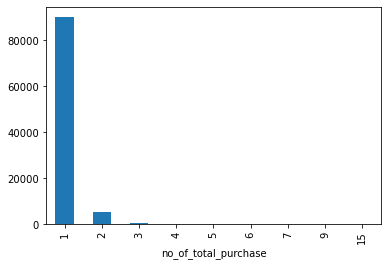

In [87]:

customer_by_purchase_time.groupby('no_of_total_purchase')['customer_unique_id'].count().plot(kind='bar')

Questions: Do customers tend to buy the same group of products when they repurchase?

In [90]:
#group of customers that buy x times

cus_item = customer_by_purchase_time.merge(items_orders, how='inner', on='customer_id')
data = pd.DataFrame(cus_item.groupby(['no_of_total_purchase', 'customer_unique_id'])['product_category_name'].nunique())
data = data.reset_index()
data.groupby('no_of_total_purchase')['product_category_name'].agg(['mean', 'median', 'max', 'min'])

,mean,median,max,min
no_of_total_purchase,,,,
1,0.993158,1.0,3,0
2,1.541748,2.0,3,0
3,2.005587,2.0,4,1
4,2.142857,2.0,4,1
5,3.111111,3.0,5,2
6,3.400000,3.0,5,2
7,3.333333,4.0,5,1
9,5.000000,5.0,5,5
15,3.000000,3.0,3,3


Returning customers tend to diversify their shopping carts when they come back.

Question: How often do repeat customers (buying 2 or more) buy?

In [91]:
#table of repetitive customers with number of total purchase more than 1 time
cus_item_2 = customer_by_purchase_time.merge(items_orders, how='inner', on='customer_id')
cus_item_2 = cus_item_2[cus_item_2['no_of_total_purchase'] > 1]
cus_item_2['order_purchase_timestamp_x'] = pd.to_datetime(cus_item_2['order_purchase_timestamp_x'])
cus_item_2['quarter'] = cus_item_2['order_purchase_timestamp_x'].dt.to_period('Q')
cus_item_2['frequency'] = cus_item_2.groupby('customer_unique_id')['quarter'].rank(method='first')
cus_item_2['frequency'].describe()


C:\Users\PC\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


count    7146.000000
mean        2.154632
std         1.745458
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        24.000000
Name: frequency, dtype: float64

On average, they buy about 2 times a quarter.

Question: How does the group of customers who buy more than once active?

<AxesSubplot:xlabel='month'>

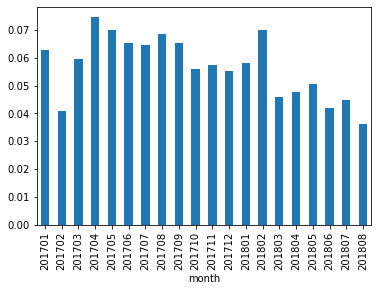

In [92]:
#Product values of repet customers to total
(cus_item_2.groupby('month')['price'].sum() / items_orders.groupby('month')['price'].sum()).plot(kind='bar')

<AxesSubplot:xlabel='month'>

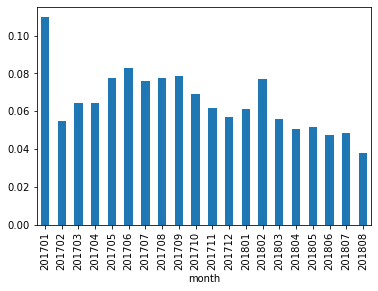

In [93]:
#Order of repet customers to total
(cus_item_2.groupby('month')['order_id'].nunique() / items_orders.groupby('month')['order_id'].nunique()).plot(kind='bar')

The group of repeat customers tends to buy less over time.